In [1]:
import numpy as np
import matplotlib.pyplot as plt
from idanalysis.analysis import StorageRingAnalysis
import pymodels, pyaccel
from idanalysis.idsdata import WLSData

In [2]:
wlsdata = WLSData()
currents = list(wlsdata.CURR_DICT.keys())


 ------------------------------------------------------ 

Current: 1 A


/home/gabriel/repos/apsuite/apsuite/orbcorr/orbit_correction.py:300: RuntimeWarning: divide by zero encountered in double_scalars
  par.corrgainch, par.maxdeltakickch/_np.abs(dkickch).max())
/home/gabriel/repos/apsuite/apsuite/orbcorr/orbit_correction.py:302: RuntimeWarning: divide by zero encountered in double_scalars
  par.corrgaincv, par.maxdeltakickcv/_np.abs(dkickcv).max())
/home/gabriel/repos/apsuite/apsuite/orbcorr/orbit_correction.py:316: RuntimeWarning: divide by zero encountered in divide
  que = [(-par.maxkickch - kickch) / dkickch, ]
/home/gabriel/repos/apsuite/apsuite/orbcorr/orbit_correction.py:317: RuntimeWarning: divide by zero encountered in divide
  que.append((par.maxkickch - kickch) / dkickch)
/home/gabriel/repos/apsuite/apsuite/orbcorr/orbit_correction.py:321: RuntimeWarning: divide by zero encountered in divide
  que = [(-par.maxkickcv - kickcv) / dkickcv, ]
/home/gabriel/repos/apsuite/apsuite/orbcorr/orbit_correction.py:322: RuntimeWarning: divide by zero encount

Sucess
Sucess


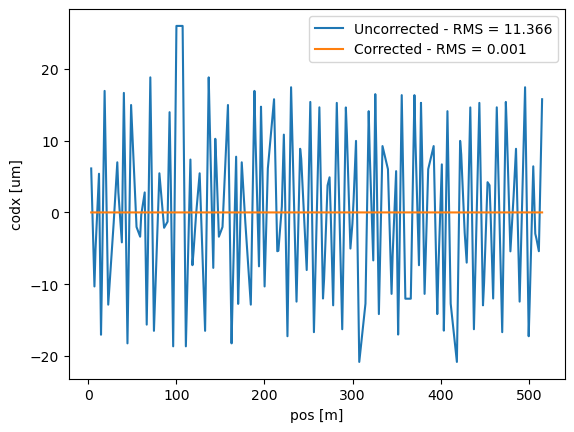

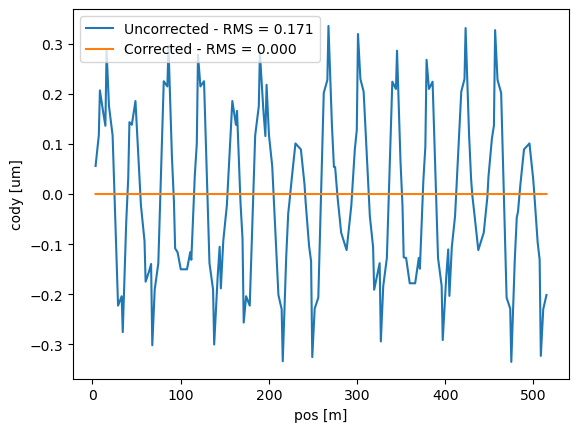

element indices for straight section begin and end:
ID15SP [4546, 4589]
local quadrupole fams: 
ID15SP {'QFP_ID': [4552, 4582], 'QDP1_ID': [4546, 4588], 'QDP2_ID': [4558, 4576]}
symmetrizing ID WLS in subsec ID15SP
iteration #1, ΔK: [ 2.24282443e-05 -3.28029253e-05 -2.60738212e-06]


In [4]:
ring_anl = StorageRingAnalysis()

ring_anl.calc_type = ring_anl.CalcTypes.symmetrized

for i, current in enumerate(currents):
    print('\n ------------------------------------------------------ \n')
    print('Current: {} A'.format(current))
    config = 'current_{}'.format(current)
    kmap_fname = 'kickmap-ID_curr_{}.txt'.format(current)
    ring_anl.add_id_to_model(
        kmap_fname=kmap_fname, subsec=wlsdata.subsecs[0],
        fam_name=wlsdata.id_famname)
    ring_anl.set_model_ids()

    ring_anl.plot_orbcorr = True
    ring_anl.run_correction_algorithms()
    ring_anl.analysis_dynapt(fpath='./', sufix=config)

nrturns      : 2048
turn_by_turn : True
x_nrpts      : 40
y_nrpts      : 20
x_min [m]    : -0.012
x_max [m]    : 0
y_min [m]    : 0
y_max [m]    : 0.004
de_offset    : 0
xl_off [rad] : 1e-05
yl_off [rad] : 1e-05
intnux       : 49.00 (for graphs)
intnuy       : 14.00 (for graphs)



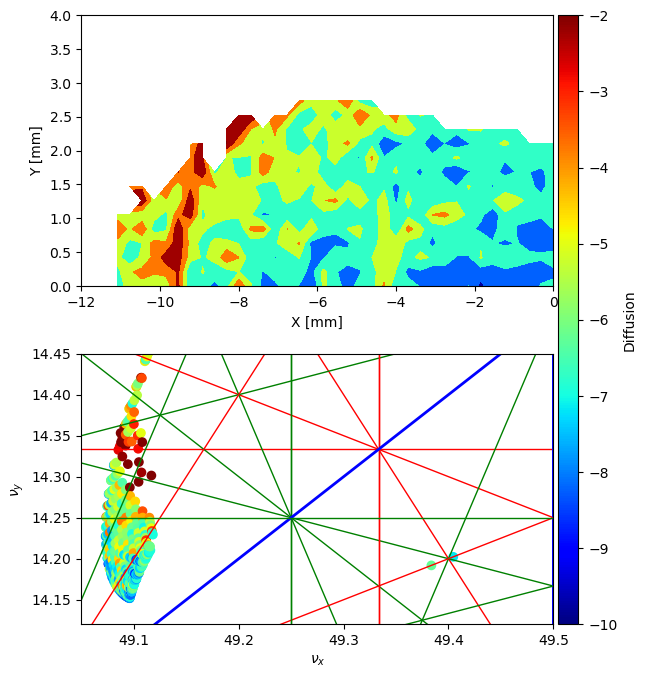

In [4]:
ring_anl.analysis_dynapt(fpath='./', sufix=config)